# 千葉県内における自転車盗難の状況分析

本レポートは、千葉県警が公開しているオープンデータ
「自転車盗（CSV形式）」を用いて、
過去1年間に発生した自転車盗難の傾向を分析するものである。

分析では以下の点に着目した。

- 発生件数の全体像
- 市区町村ごとの発生状況
- 月別・時間帯別の傾向
- 被害者の属性
- 施錠の有無による盗難発生への影響


In [1]:
import pandas as pd

df = pd.read_csv("000067003.csv")
df.head()


,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9943 entries, 0 to 9942
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   罪名             9943 non-null   object 
 1   手口             9943 non-null   object 
 2   管轄警察署（発生地）     9943 non-null   object 
 3   管轄交番・駐在所（発生地）  9938 non-null   object 
 4   市区町村コード（発生地）   9942 non-null   float64
 5   都道府県（発生地）      9942 non-null   object 
 6   市区町村（発生地）      9942 non-null   object 
 7   町丁目（発生地）       9921 non-null   object 
 8   発生年月日（始期）      9943 non-null   object 
 9   発生時（始期）        9943 non-null   object 
 10  発生場所           9943 non-null   object 
 11  発生場所の詳細        9943 non-null   object 
 12  被害者の年齢         9943 non-null   object 
 13  被害者の職業         9943 non-null   object 
 14  施錠関係           9943 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.1+ MB


In [3]:
df.columns


Index(['罪名', '手口', '管轄警察署（発生地）', '管轄交番・駐在所（発生地）', '市区町村コード（発生地）', '都道府県（発生地）',
       '市区町村（発生地）', '町丁目（発生地）', '発生年月日（始期）', '発生時（始期）', '発生場所', '発生場所の詳細',
       '被害者の年齢', '被害者の職業', '施錠関係'],
      dtype='object')

データには、発生日、市区町村、被害者の属性、施錠の有無など、
自転車盗難に関する詳細な情報が含まれている。


In [4]:
len(df)


9943

過去1年間に発生した自転車盗難件数は 9943件であった


In [5]:
area_counts = (
    df.groupby('市区町村（発生地）')
      .size()
      .sort_values(ascending=False)
)

area_counts.head(10)


市区町村（発生地）
船橋市       1263
市川市        872
柏市         691
松戸市        678
千葉市中央区     656
八千代市       458
習志野市       450
浦安市        435
野田市        367
千葉市稲毛区     334
dtype: int64

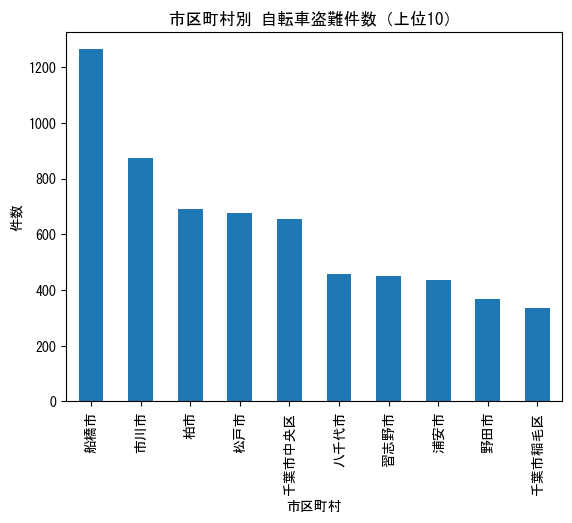

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'  # Windows

area_counts.head(10).plot(kind='bar')
plt.title('市区町村別 自転車盗難件数（上位10）')
plt.xlabel('市区町村')
plt.ylabel('件数')
plt.show()


市川市や船橋市など、人口が多く駅周辺が発達している地域で
自転車盗難が多い傾向が見られる。


In [7]:
df['発生日'] = pd.to_datetime(
    df['発生年月日（始期）'], format="%Y%m%d", errors='coerce'
)

df['月'] = df['発生日'].dt.month
monthly_counts = df.groupby('月').size()
monthly_counts


月
1.0      620
2.0      569
3.0      681
4.0      761
5.0      813
6.0      826
7.0     1027
8.0      943
9.0      984
10.0     956
11.0     888
12.0     782
dtype: int64

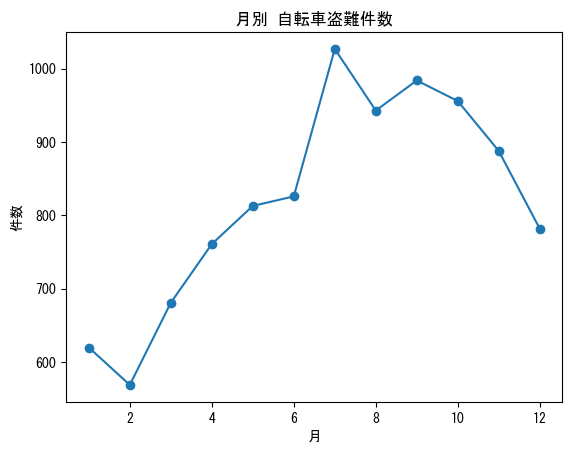

In [8]:
monthly_counts.plot(kind='line', marker='o')
plt.title('月別 自転車盗難件数')
plt.xlabel('月')
plt.ylabel('件数')
plt.show()


夏季（特に６月〜７月）に盗難件数が増加する傾向が見られた。
これは屋外に自転車を置く機会が増えるためと考えられる。


In [12]:
df['発生時（始期）'].value_counts().head(10)



発生時（始期）
7     919
18    875
17    859
16    695
8     675
19    606
12    508
20    500
15    473
10    433
Name: count, dtype: int64

In [13]:
df['時間帯'] = pd.cut(
    df['発生時（始期）'],
    bins=[0, 6, 12, 18, 24],
    labels=['深夜', '朝', '昼', '夕方']
)

df.groupby('時間帯').size()


TypeError: '<' not supported between instances of 'int' and 'str'

In [14]:
lock_counts = df['施錠関係'].value_counts()
lock_counts


施錠関係
施錠せず    6781
施錠した    3162
Name: count, dtype: int64

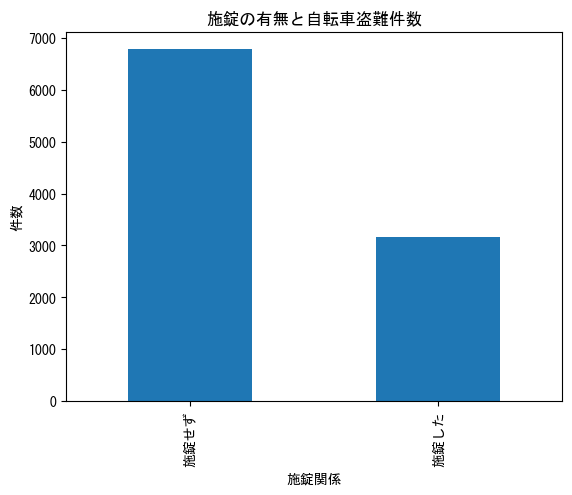

In [15]:
lock_counts.plot(kind='bar')
plt.title('施錠の有無と自転車盗難件数')
plt.xlabel('施錠関係')
plt.ylabel('件数')
plt.show()


施錠していなかった自転車の盗難件数が、
施錠していたものに比べて明らかに多い。

この結果から、
**施錠の有無が自転車盗難防止に大きな影響を与えている**
ことが示唆される。


In [16]:
df['被害者の職業'].value_counts().head(10)


被害者の職業
その他            4968
高校生            2208
大学生            1612
中学生             886
小学生             239
法人・団体、被害者なし      30
Name: count, dtype: int64

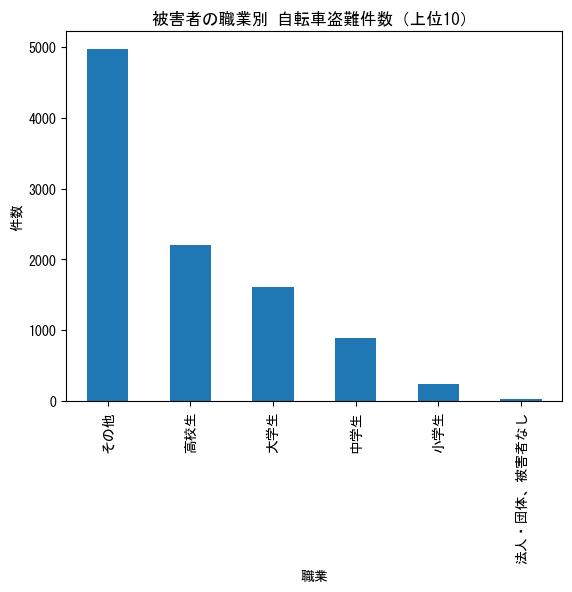

In [17]:
df['被害者の職業'].value_counts().head(10).plot(kind='bar')
plt.title('被害者の職業別 自転車盗難件数（上位10）')
plt.xlabel('職業')
plt.ylabel('件数')
plt.show()


## まとめ

- 自転車盗難は都市部で多く発生している
- 夏季や深夜帯に件数が増加する傾向がある
- 施錠していない自転車は盗難リスクが非常に高い
- 基本的な防犯対策（施錠）の徹底が重要である

以上の結果から、地域住民への施錠啓発活動や、
駅周辺での防犯対策強化が有効であると考えられる。
